In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

In [3]:
df1 = pd.read_csv('X_train.csv')
df1.rename(columns={df1.columns[0]: 'student_id'}, inplace=True)

df2 = pd.read_csv('Y_train.csv') 
df2.rename(columns={df2.columns[0]: 'student_id'}, inplace=True)

df = df1.merge(df2[['student_id', 'MathScore']], on='student_id', how='left')

In [ ]:
counts = df2['student_id'].value_counts()

duplicates = counts[counts > 1]

if not duplicates.empty:
    print("Student IDs with multiple entries")
else:
    print("no")

print(counts)

no
student_id
384002     1
639719     1
854210     1
1173881    1
792386     1
          ..
1347274    1
1244759    1
27856      1
1318323    1
121958     1
Name: count, Length: 1172086, dtype: int64


### Parental Support

In [ ]:
support_vars = ['ST353', 'PA003', 'ST300', 'PA004']

df_support = df[support_vars].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

df_support_clean = df_support.dropna()

scaler = StandardScaler()
df_support_scaled = pd.DataFrame(
    scaler.fit_transform(df_support_clean),
    columns=support_vars,
    index=df_support_clean.index
)

print("Variables standardisées (z-scores) :")
print(df_support_scaled.describe())

Variables standardisées (z-scores) :
              ST353         PA003         ST300         PA004
count  4.113200e+05  4.113200e+05  4.113200e+05  4.113200e+05
mean  -4.570020e-17  1.988317e-17  1.611556e-16 -1.240582e-16
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00
min   -4.984377e-01 -4.034446e-01 -1.618657e+00 -4.126942e-01
25%   -4.984377e-01 -4.034446e-01 -7.254115e-01 -4.126942e-01
50%   -4.984377e-01 -4.034446e-01  1.678343e-01 -4.126942e-01
75%   -1.406555e-03 -4.034446e-01  1.061080e+00 -4.126942e-01
max    4.471874e+00  4.061381e+00  1.061080e+00  2.712799e+00


In [77]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_support_scaled)

print(f"\nVariance expliquée par chaque composante :")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  Composante {i+1} : {var*100:.2f}%")

print(f"\nVariance cumulée :")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(cumsum):
    print(f"  {i+1} composante(s) : {var*100:.2f}%")

first_component = pd.DataFrame({
    'Variable': support_vars,
    'Loading': pca.components_[0]
}).sort_values('Loading', ascending=False)
print(first_component)


Variance expliquée par chaque composante :
  Composante 1 : 48.96%
  Composante 2 : 27.71%
  Composante 3 : 22.12%
  Composante 4 : 1.21%

Variance cumulée :
  1 composante(s) : 48.96%
  2 composante(s) : 76.67%
  3 composante(s) : 98.79%
  4 composante(s) : 100.00%
  Variable   Loading
1    PA003  0.704767
3    PA004  0.704674
0    ST353  0.081039
2    ST300 -0.013086


In [78]:
pca_first = PCA(n_components=1)
parental_support_index_values = pca_first.fit_transform(df_support_scaled).flatten()

df['ParentalSupportIndex'] = np.nan

df.loc[df_support_clean.index, 'ParentalSupportIndex'] = parental_support_index_values

print("PARENTAL SUPPORT INDEX AJOUTÉ AU DATAFRAME")
print(f"Nombre total d'élèves dans df : {len(df)}")
print(f"Élèves avec ParentalSupportIndex : {df['ParentalSupportIndex'].notna().sum()}")
print(f"Élèves sans ParentalSupportIndex : {df['ParentalSupportIndex'].isna().sum()}")

print(f"\nStatistiques de l'index :")
print(df['ParentalSupportIndex'].describe())


print("\nAperçu (avec student_id) :")
print(df[['student_id', 'ParentalSupportIndex']].head(10))

PARENTAL SUPPORT INDEX AJOUTÉ AU DATAFRAME
Nombre total d'élèves dans df : 1172086
Élèves avec ParentalSupportIndex : 411320
Élèves sans ParentalSupportIndex : 760766

Statistiques de l'index :
count    4.113200e+05
mean     2.325174e-17
std      1.399385e+00
min     -6.294271e-01
25%     -6.177383e-01
50%     -5.943608e-01
75%     -4.735238e-01
max      5.157543e+00
Name: ParentalSupportIndex, dtype: float64

Aperçu (avec student_id) :
   student_id  ParentalSupportIndex
0      384002                   NaN
1     1118072             -0.594361
2      845454             -0.629427
3     1728613                   NaN
4     1083243             -0.629427
5     1126877             -0.617738
6     1725954                   NaN
7      142970                   NaN
8     1639308                   NaN
9      666434             -0.456622


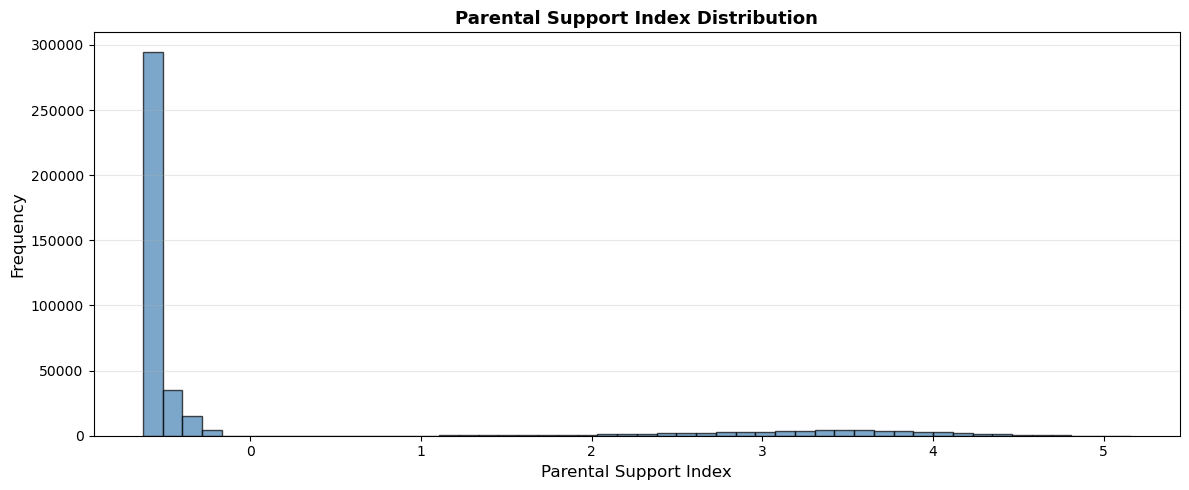

In [79]:
plt.figure(figsize=(12, 5))

plt.hist(df['ParentalSupportIndex'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Parental Support Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Parental Support Index Distribution', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

In [16]:
df['ST307'].unique()

array([       nan, 1.66666667, 2.33333333, 4.        , 2.        ,
       3.33333333, 0.        , 2.66666667, 1.33333333, 3.        ,
       3.66666667, 0.66666667, 0.33333333, 1.        , 2.66666667])

In [80]:
from scipy import stats

mask = df['ParentalSupportIndex'].notna() & df['ST307'].notna()
x = df.loc[mask, 'ST307']
y = df.loc[mask, 'ParentalSupportIndex']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


print(f"Coefficient (pente) : {slope:.4f}")
print(f"R² : {r_value**2:.4f}")
print(f"p-value : {p_value:.4e}")
print(f"Significatif ? {'OUI' if p_value < 0.05 else 'NON'}")

Coefficient (pente) : -0.0046
R² : 0.0000
p-value : 2.2875e-02
Significatif ? OUI


    Support_mean  ST307_mean  count
0      -0.628704    2.912877  84283
1      -0.618604    2.536232  77032
2      -0.613842    2.370077  11884
3      -0.608113    2.262227  18395
4      -0.594959    1.790720  69043
5      -0.583103    2.585937   7073
6      -0.548631    2.585696  21872
7      -0.500372    2.478679  19480
8      -0.439202    2.557493  20246
9      -0.302967    2.580683  20314
10      2.451063    2.340396  20579
11      3.334343    2.470147  20556
12      3.994401    2.505682  20563


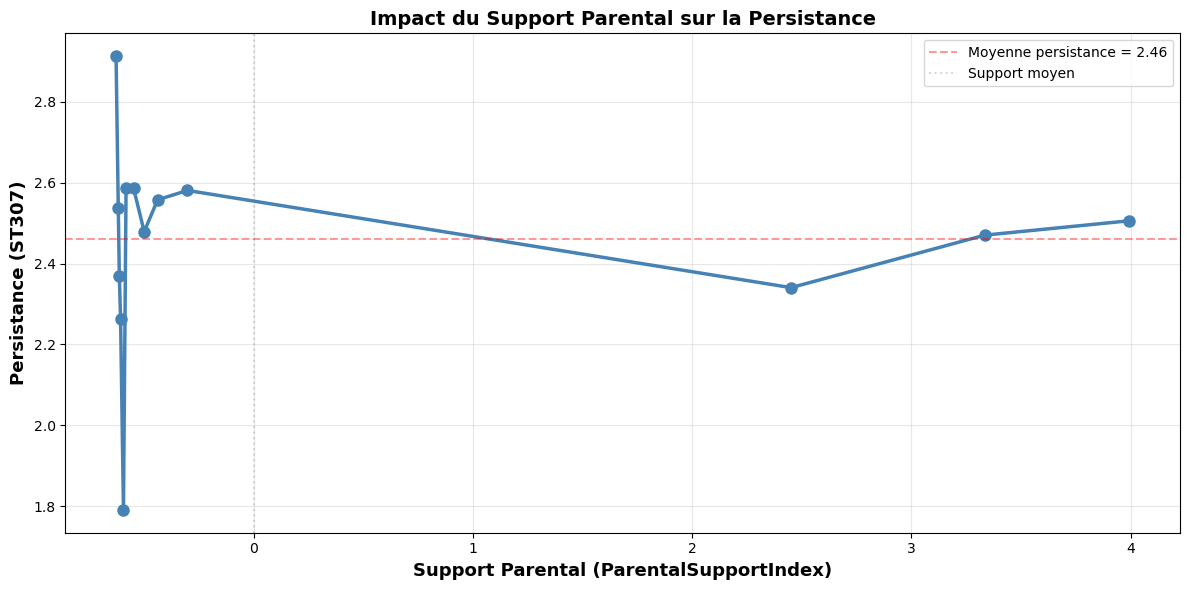

In [82]:
import numpy as np
import matplotlib.pyplot as plt

df['Support_bin'] = pd.qcut(df['ParentalSupportIndex'], 
                             q=20,
                             duplicates='drop')

# Calculer les moyennes de ST307 par bin
means = df.groupby('Support_bin', observed=True).agg({
    'ST307': ['mean', 'count'],
    'ParentalSupportIndex': 'mean'
}).reset_index()

means.columns = ['bin', 'ST307_mean', 'count', 'Support_mean']

# Filtrer les groupes avec au moins 100 observations pour robustesse
means = means[means['count'] >= 100]

print(means[['Support_mean', 'ST307_mean', 'count']])

plt.figure(figsize=(12, 6))
plt.plot(means['Support_mean'], means['ST307_mean'], 
         marker='o', linewidth=2.5, markersize=8, color='steelblue')
plt.xlabel('Support Parental (ParentalSupportIndex)', fontsize=13, fontweight='bold')
plt.ylabel('Persistance (ST307)', fontsize=13, fontweight='bold')
plt.title('Impact du Support Parental sur la Persistance', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(df['ST307'].mean(), color='red', linestyle='--', alpha=0.4, 
            label=f'Moyenne persistance = {df["ST307"].mean():.2f}')
plt.axvline(0, color='gray', linestyle=':', alpha=0.3, label='Support moyen')
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
df['ParentalSupportIndex'].unique()

array([        nan, -0.59436083, -0.62942709, ...,  1.93104941,
        2.65351184,  3.72535698])

In [84]:
df['ParentalSupportIndex'].describe()

count    4.113200e+05
mean     2.325174e-17
std      1.399385e+00
min     -6.294271e-01
25%     -6.177383e-01
50%     -5.943608e-01
75%     -4.735238e-01
max      5.157543e+00
Name: ParentalSupportIndex, dtype: float64

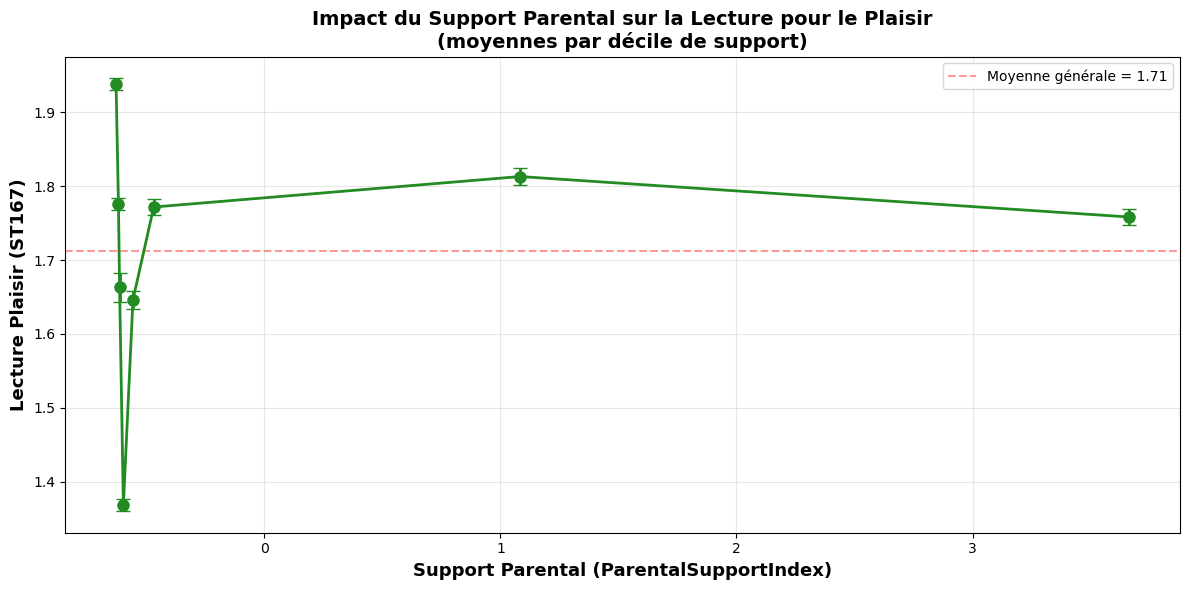

   Support_mean  ST167_mean  count
0        -0.629       1.938  84283
1        -0.619       1.777  77032
2        -0.614       1.663  11884
3        -0.598       1.368  87438
4        -0.557       1.647  28945
5        -0.469       1.772  39726
6         1.083       1.813  40893
7         3.664       1.758  41119


In [85]:
import numpy as np
import matplotlib.pyplot as plt

df['Support_decile'] = pd.qcut(df['ParentalSupportIndex'], q=10, labels=False, duplicates='drop')

# Calculer les moyennes de ST167 par décile
means_lecture = df.groupby('Support_decile').agg({
    'ST167': ['mean', 'count', 'std'],
    'ParentalSupportIndex': 'mean'
}).reset_index()

means_lecture.columns = ['decile', 'ST167_mean', 'count', 'ST167_std', 'Support_mean']
means_lecture['se'] = means_lecture['ST167_std'] / np.sqrt(means_lecture['count'])

# Graphique
plt.figure(figsize=(12, 6))
plt.errorbar(means_lecture['Support_mean'], means_lecture['ST167_mean'], 
             yerr=1.96*means_lecture['se'], 
             marker='o', capsize=5, linewidth=2, markersize=8, color='forestgreen')
plt.xlabel('Support Parental (ParentalSupportIndex)', fontsize=13, fontweight='bold')
plt.ylabel('Lecture Plaisir (ST167)', fontsize=13, fontweight='bold')
plt.title('Impact du Support Parental sur la Lecture pour le Plaisir\n(moyennes par décile de support)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(df['ST167'].mean(), color='red', linestyle='--', alpha=0.4, 
            label=f'Moyenne générale = {df["ST167"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(means_lecture[['Support_mean', 'ST167_mean', 'count']].round(3))

In [69]:
df['PA156'].describe()

count    411320.000000
mean          0.244284
std           0.673200
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: PA156, dtype: float64

In [70]:
df['PA156'].unique()

array([       nan, 0.        , 1.66666667, 2.        , 2.66666667,
       1.33333333, 4.        , 1.        , 2.33333333, 3.        ,
       3.66666667, 0.33333333, 0.66666667, 3.33333333, 2.66666667])

Valeurs manquantes : 760766 / 1172086
    PA156  Support_mean   count
0   0.000        -0.554  351522
1   0.333         2.864    3394
2   0.667         2.981    6614
3   1.000         3.097    8573
4   1.333         3.185    9027
5   1.667         3.276    8324
6   2.000         3.332    7828
7   2.333         3.429    5317
8   2.667         3.490    4614
9   3.000         3.594    3016
10  3.333         3.687    1628
11  3.667         3.740     711
12  4.000         3.723     752


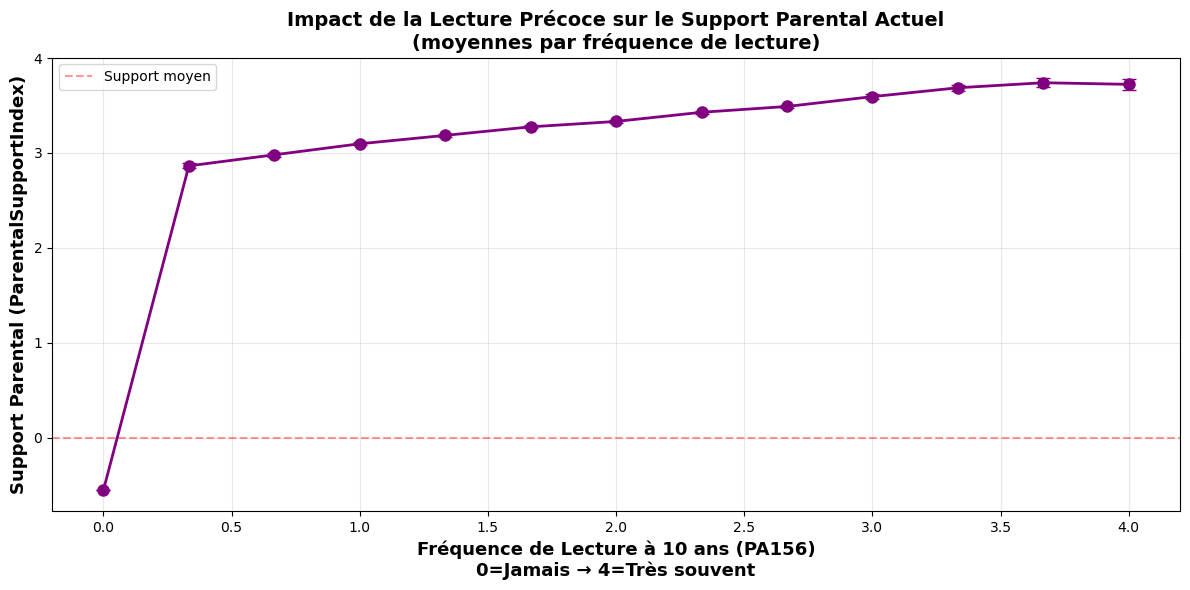

In [86]:
import numpy as np
import matplotlib.pyplot as plt

print(f"Valeurs manquantes : {df['PA156'].isna().sum()} / {len(df)}")

df['PA156_rounded'] = (df['PA156'] * 3).round() / 3

means_lecture_support = df.groupby('PA156_rounded').agg({
    'ParentalSupportIndex': ['mean', 'count', 'std']
}).reset_index()

means_lecture_support.columns = ['PA156', 'Support_mean', 'count', 'Support_std']
means_lecture_support['se'] = means_lecture_support['Support_std'] / np.sqrt(means_lecture_support['count'])

means_lecture_support = means_lecture_support[means_lecture_support['count'] >= 100]

print(means_lecture_support[['PA156', 'Support_mean', 'count']].round(3))

plt.figure(figsize=(12, 6))
plt.errorbar(means_lecture_support['PA156'], means_lecture_support['Support_mean'], 
             yerr=1.96*means_lecture_support['se'],
             marker='o', capsize=5, linewidth=2, markersize=8, color='purple')
plt.xlabel('Fréquence de Lecture à 10 ans (PA156)\n0=Jamais → 4=Très souvent', 
           fontsize=13, fontweight='bold')
plt.ylabel('Support Parental (ParentalSupportIndex)', fontsize=13, fontweight='bold')
plt.title('Impact de la Lecture Précoce sur le Support Parental Actuel\n(moyennes par fréquence de lecture)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(0, color='red', linestyle='--', alpha=0.4, 
            label='Support moyen')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
df['OverallPerformance'].describe()

count    1.168078e+06
mean     5.155022e-01
std      2.008216e-01
min      0.000000e+00
25%      3.603896e-01
50%      5.126263e-01
75%      6.687500e-01
max      1.000000e+00
Name: OverallPerformance, dtype: float64

Nombre d'observations (sans PA042=0.0): 32233

Statistiques par catégorie de revenu (sans 0.0):
   PA042  Support_mean  count  Support_std        se
0    0.2      3.217862   8262     0.794223  0.008738
1    0.4      3.221683   5725     0.782243  0.010338
2    0.6      3.236038   4526     0.738490  0.010977
3    0.8      3.243855   3836     0.735192  0.011870
4    1.0      3.297211   9884     0.684846  0.006889


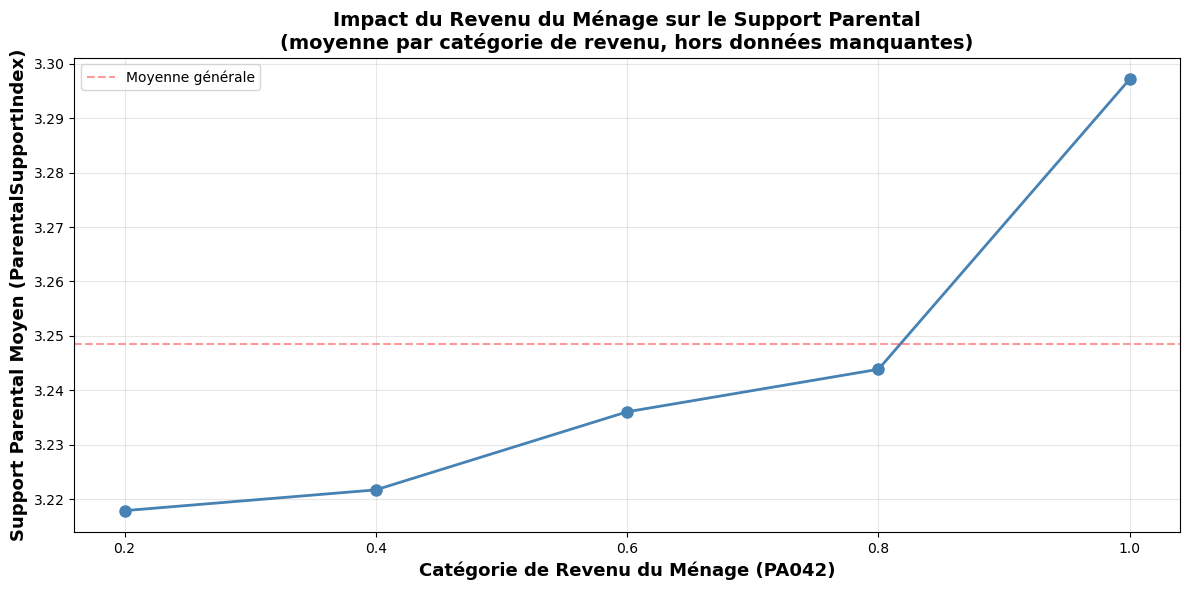

In [89]:
import numpy as np
import matplotlib.pyplot as plt

df_valid = df[(df['PA042'].notna()) & 
              (df['ParentalSupportIndex'].notna()) & 
              (df['PA042'] != 0.0)].copy()

print(f"Nombre d'observations (sans PA042=0.0): {len(df_valid)}")

means = df_valid.groupby('PA042').agg({
    'ParentalSupportIndex': ['mean', 'count', 'std']
}).reset_index()

means.columns = ['PA042', 'Support_mean', 'count', 'Support_std']
means['se'] = means['Support_std'] / np.sqrt(means['count'])
means = means.sort_values('PA042')

print("\nStatistiques par catégorie de revenu (sans 0.0):")
print(means)

plt.figure(figsize=(12, 6))
plt.plot(means['PA042'], means['Support_mean'], 
             #yerr=1.96*means['se'],  # IC à 95%
             marker='o',
             #capsize=5,
             linewidth=2, markersize=8, 
             color='steelblue')
plt.xlabel('Catégorie de Revenu du Ménage (PA042)', fontsize=13, fontweight='bold')
plt.ylabel('Support Parental Moyen (ParentalSupportIndex)', fontsize=13, fontweight='bold')
plt.title('Impact du Revenu du Ménage sur le Support Parental\n(moyenne par catégorie de revenu, hors données manquantes)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(df_valid['ParentalSupportIndex'].mean(), color='red', linestyle='--', 
            alpha=0.4, label='Moyenne générale')
plt.xticks(means['PA042'])
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
df['PA042'].unique()

array([0. , nan, 0.2, 1. , 0.4, 0.6, 0.8])

In [41]:
df['PA156'].unique()

array([       nan, 0.        , 1.66666667, 2.        , 2.66666667,
       1.33333333, 4.        , 1.        , 2.33333333, 3.        ,
       3.66666667, 0.33333333, 0.66666667, 3.33333333, 2.66666667])

In [11]:
df['ParentalSupportIndex'].describe()

count    4.113200e+05
mean     2.325174e-17
std      1.399385e+00
min     -6.294271e-01
25%     -6.177383e-01
50%     -5.943608e-01
75%     -4.735238e-01
max      5.157543e+00
Name: ParentalSupportIndex, dtype: float64

In [19]:
df['ST307'].unique()

array([       nan, 1.66666667, 2.33333333, 4.        , 2.        ,
       3.33333333, 0.        , 2.66666667, 1.33333333, 3.        ,
       3.66666667, 0.66666667, 0.33333333, 1.        , 2.66666667])

In [13]:
df.loc[:20, ['ST301']]

,ST301
0,3.50
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,3.50
8,NaN
9,NaN


In [14]:
df.loc[:20, ['ParentalSupportIndex']]


,ParentalSupportIndex
0,NaN
1,-0.594361
2,-0.629427
3,NaN
4,-0.629427
5,-0.617738
6,NaN
7,NaN
8,NaN
9,-0.456622


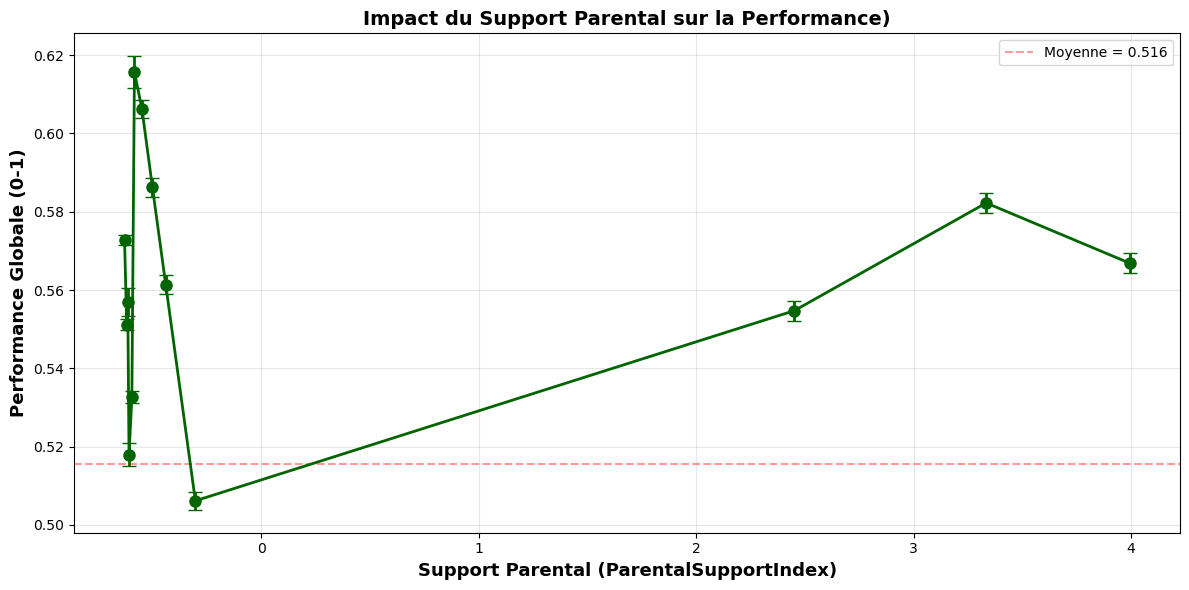

In [92]:
# Créer des bins de ParentalSupportIndex
df['Support_bin'] = pd.qcut(df['ParentalSupportIndex'], q=20, duplicates='drop')

# Calculer moyennes
means = df.groupby('Support_bin', observed=True).agg({
    'OverallPerformance': ['mean', 'count', 'std'],
    'ParentalSupportIndex': 'mean'
}).reset_index()

means.columns = ['bin', 'Perf_mean', 'count', 'Perf_std', 'Support_mean']
means['se'] = means['Perf_std'] / np.sqrt(means['count'])

# Filtrer groupes robustes
means = means[means['count'] >= 100]

# Graphique
plt.figure(figsize=(12, 6))
plt.errorbar(means['Support_mean'], means['Perf_mean'], 
             yerr=1.96*means['se'],
             marker='o', capsize=5, linewidth=2, markersize=8, color='darkgreen')
plt.xlabel('Support Parental (ParentalSupportIndex)', fontsize=13, fontweight='bold')
plt.ylabel('Performance Globale (0-1)', fontsize=13, fontweight='bold')
plt.title(f'Impact du Support Parental sur la Performance)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(df['OverallPerformance'].mean(), color='red', linestyle='--', alpha=0.4,
            label=f'Moyenne = {df["OverallPerformance"].mean():.3f}')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
df['AGE'].describe()


count    1.168818e+06
mean     1.579184e+01
std      2.908386e-01
min      1.508000e+01
25%      1.558000e+01
50%      1.575000e+01
75%      1.600000e+01
max      1.642000e+01
Name: AGE, dtype: float64

In [33]:
df1['math_q1_total_timing'].describe()

count    6.793450e+05
mean     9.256004e+04
std      1.088489e+05
min      6.262500e+02
25%      4.843433e+04
50%      7.765100e+04
75%      1.185250e+05
max      4.987375e+07
Name: math_q1_total_timing, dtype: float64

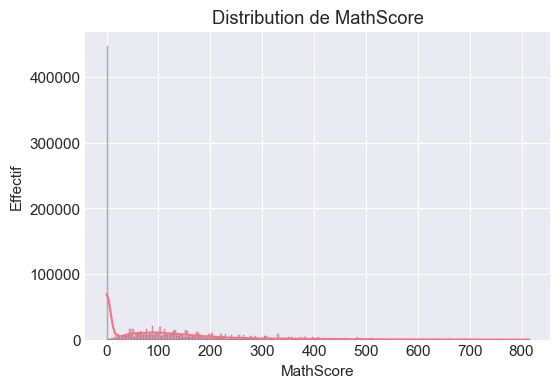

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['MathScore'], kde=True)
plt.title("Distribution de MathScore")
plt.xlabel("MathScore")
plt.ylabel("Effectif")
plt.show()


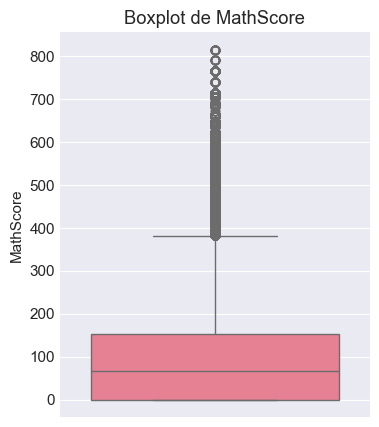

In [47]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['MathScore'])
plt.title("Boxplot de MathScore")
plt.ylabel("MathScore")
plt.show()


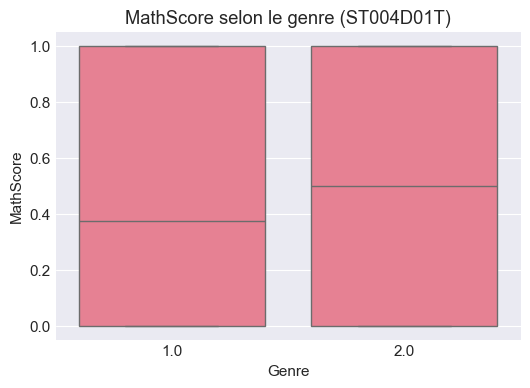

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='ST004D01T', y='math_q1_average_score')
plt.title("MathScore selon le genre (ST004D01T)")
plt.xlabel("Genre")
plt.ylabel("MathScore")
plt.show()


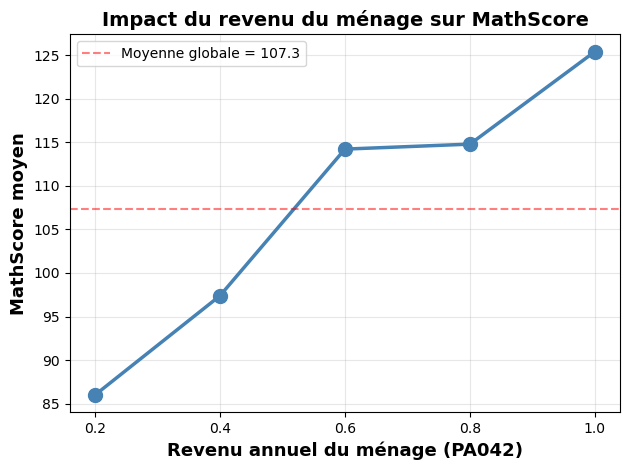


Corrélation PA042 vs MathScore : 0.129


In [96]:
df_income = df[(df['PA042'].notna()) & (df['PA042'] > 0) & (df['MathScore'].notna())].copy()


income_stats = df_income.groupby('PA042').agg({
    'MathScore': ['mean', 'median', 'std', 'count']
}).reset_index()

income_stats.columns = ['PA042', 'MathScore_mean', 'MathScore_median', 'MathScore_std', 'count']


plt.plot(income_stats['PA042'], income_stats['MathScore_mean'], 
             marker='o', linewidth=2.5, markersize=10, color='steelblue')
plt.xlabel('Revenu annuel du ménage (PA042)', fontsize=13, fontweight='bold')
plt.ylabel('MathScore moyen', fontsize=13, fontweight='bold')
plt.title('Impact du revenu du ménage sur MathScore', 
                  fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(df_income['MathScore'].mean(), color='red', linestyle='--', alpha=0.5, 
                label=f'Moyenne globale = {df_income["MathScore"].mean():.1f}')
plt.legend()
plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

correlation = df_income['PA042'].corr(df_income['MathScore'])
print(f"\nCorrélation PA042 vs MathScore : {correlation:.3f}")

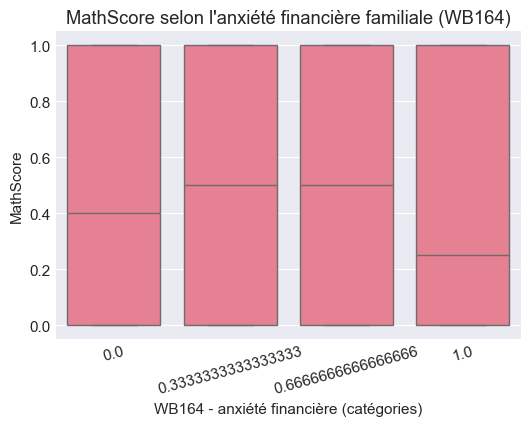

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='WB164', y='math_q1_average_score')
plt.title("MathScore selon l'anxiété financière familiale (WB164)")
plt.xlabel("WB164 - anxiété financière (catégories)")
plt.ylabel("MathScore")
plt.xticks(rotation=15)
plt.show()


In [ ]:
df['math_mean_time'] = df['math_mean_time'] / 1000

df_time = df[(df['math_mean_time'] > 10) & 
             (df['math_mean_time'] < 600) & 
             (df['MathScore'].notna())].copy()

print(f"Données après filtrage : {len(df_time)} élèves")
print(df_time['math_mean_time'].describe())

df_time['time_bin'] = pd.qcut(df_time['math_mean_time'], 
                               q=20, 
                               duplicates='drop')

time_stats = df_time.groupby('time_bin', observed=True).agg({
    'MathScore': ['mean', 'median', 'std', 'count'],
    'math_mean_time': 'mean'
}).reset_index()

time_stats.columns = ['bin', 'MathScore_mean', 'MathScore_median', 'MathScore_std', 'count', 'time_mean']

time_stats = time_stats[time_stats['count'] >= 100]

print("MathScore moyen par tranche de temps :")
print(time_stats[['time_mean', 'MathScore_mean', 'count']])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(time_stats['time_mean'], time_stats['MathScore_mean'], 
             marker='o', linewidth=2.5, markersize=8, color='steelblue')
axes[0].set_xlabel('Temps moyen par exercice (secondes)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('MathScore moyen', fontsize=13, fontweight='bold')
axes[0].set_title('Impact du temps passé sur MathScore', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axhline(df_time['MathScore'].mean(), color='red', linestyle='--', alpha=0.5, 
                label=f'Moyenne globale = {df_time["MathScore"].mean():.1f}')
axes[0].legend()

axes[1].bar(range(len(time_stats)), time_stats['MathScore_mean'], 
            yerr=time_stats['MathScore_std'], capsize=3,
            color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Groupes de temps (du plus rapide au plus lent)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MathScore moyen', fontsize=12, fontweight='bold')
axes[1].set_title('MathScore par groupe de temps (avec écart-type)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
axes[1].axhline(df_time['MathScore'].mean(), color='red', linestyle='--', alpha=0.5)
axes[1].set_xticks([])  

plt.tight_layout()
plt.show()

correlation = df_time['math_mean_time'].corr(df_time['MathScore'])
print(f"\nCorrélation temps moyen vs MathScore : {correlation:.3f}")

df_time['time_quartile'] = pd.qcut(df_time['math_mean_time'], 
                                     q=4, 
                                     labels=['Q1 (rapide)', 'Q2', 'Q3', 'Q4 (lent)'])

print("MathScore moyen par quartile de temps :")
quartile_stats = df_time.groupby('time_quartile')['MathScore'].agg([
    ('Moyenne', 'mean'),
    ('Médiane', 'median'),
    ('Écart-type', 'std'),
    ('Nombre', 'count')
]).round(2)
print(quartile_stats)

In [22]:
df['WB177'].describe()

count    411320.000000
mean          0.156867
std           0.504023
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: WB177, dtype: float64

In [23]:
df['WB177'].unique()

array([       nan, 0.        , 0.66666667, 1.        , 1.66666667,
       1.33333333, 2.33333333, 2.        , 0.33333333, 3.        ,
       4.        , 3.33333333, 2.66666667, 3.66666667, 2.66666667])

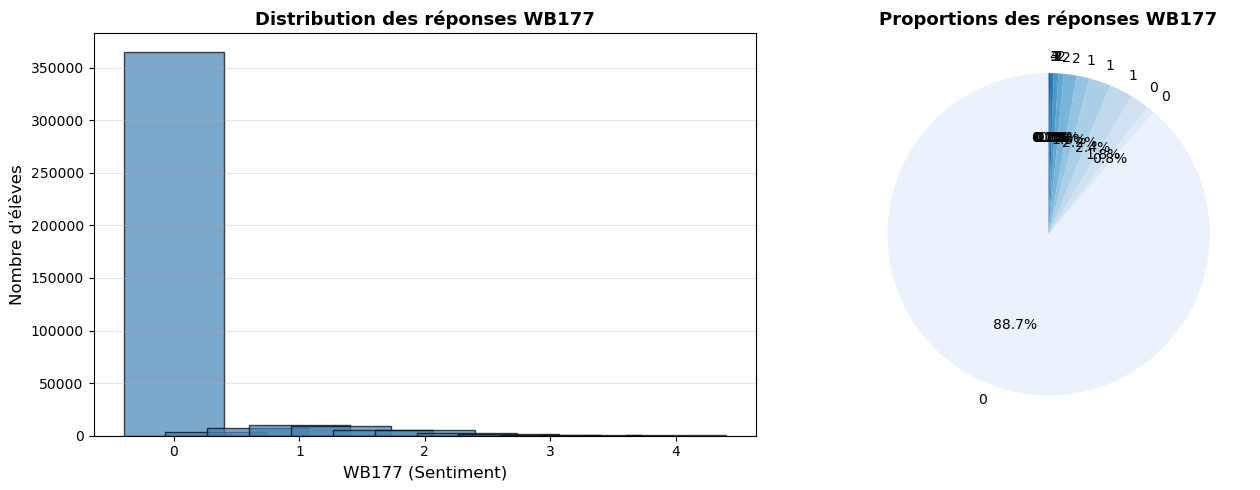

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(df['WB177'].value_counts().sort_index().index, 
            df['WB177'].value_counts().sort_index().values,
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('WB177 (Sentiment)', fontsize=12)
axes[0].set_ylabel('Nombre d\'élèves', fontsize=12)
axes[0].set_title('Distribution des réponses WB177', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_xticks([0, 1, 2, 3, 4])

# Pie chart
wb_counts = df['WB177'].value_counts().sort_index()
axes[1].pie(wb_counts.values, labels=[f'{int(i)}' for i in wb_counts.index], 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues', len(wb_counts)))
axes[1].set_title('Proportions des réponses WB177', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

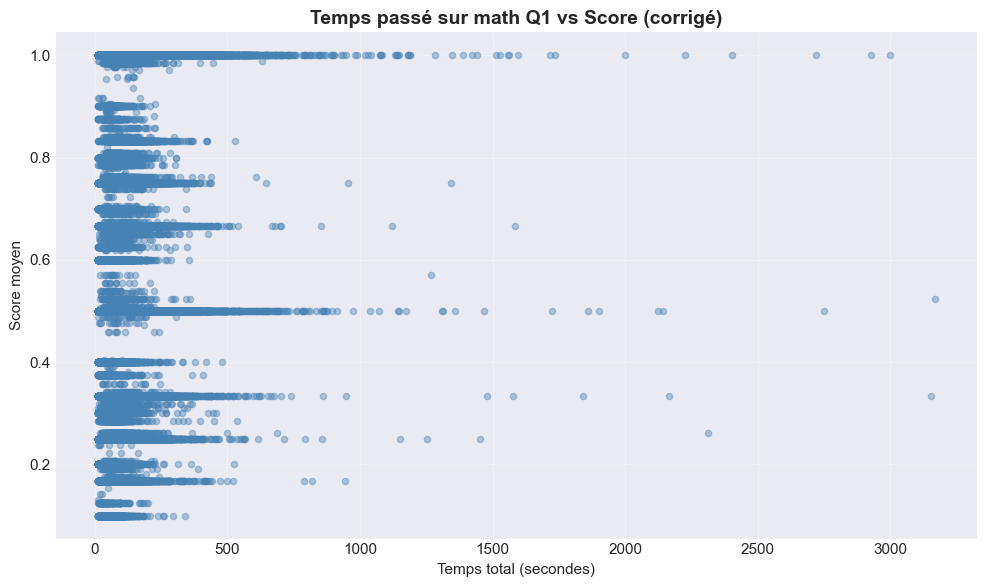

Données conservées : 380364 / 1172086 (32.5%)


In [ ]:
df['math_q1_total_timing'] = df['math_q1_total_timing'] / 1000

df_clean = df[
    (df['math_q1_total_timing'] > 10) &
    (df['math_q1_total_timing'] < 3600) &
    (df['math_q1_average_score'] > 0) &
    (df['math_q1_average_score'].notna())
].copy()

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['math_q1_total_timing'], 
            df_clean['math_q1_average_score'], 
            alpha=0.4, s=20, color='steelblue')
plt.title("Temps passé sur math Q1 vs Score (corrigé)", fontsize=14, fontweight='bold')
plt.xlabel("Temps total (secondes)")
plt.ylabel("Score moyen")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Données conservées : {len(df_clean)} / {len(df)} ({len(df_clean)/len(df)*100:.1f}%)")

In [17]:
df['math_q1_average_score'].describe()

count    735735.000000
mean          0.431752
std           0.430405
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: math_q1_average_score, dtype: float64

In [16]:
df['math_mean_time'].describe()

count    6.793450e+05
mean     9.442609e+04
std      4.678677e+04
min      8.248000e+02
25%      7.179298e+04
50%      9.306447e+04
75%      1.129564e+05
max      9.477037e+06
Name: math_mean_time, dtype: float64

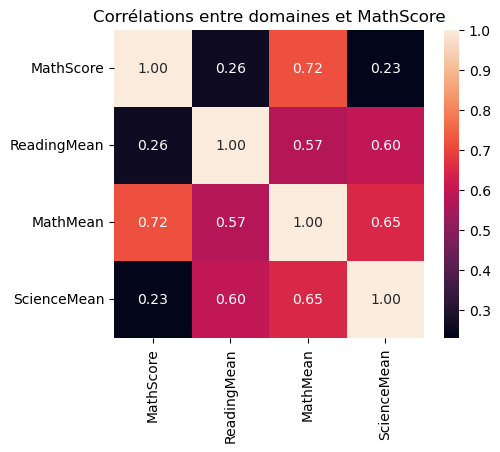

In [ ]:
reading_cols = [c for c in df.columns if c.startswith('reading_q') and 'average_score' in c]
math_cols    = [c for c in df.columns if c.startswith('math_q') and 'average_score' in c]
science_cols = [c for c in df.columns if c.startswith('science_q') and 'average_score' in c]

df['ReadingMean'] = df[reading_cols].mean(axis=1)
df['MathMean']    = df[math_cols].mean(axis=1)
df['ScienceMean'] = df[science_cols].mean(axis=1)

corr_vars = ['MathScore', 'ReadingMean', 'MathMean', 'ScienceMean']
plt.figure(figsize=(5,4))
sns.heatmap(df[corr_vars].corr(), annot=True, fmt=".2f")
plt.title("Corrélations entre domaines et MathScore")
plt.show()


In [103]:
df['OverallPerformance'] = df[['ReadingMean', 'MathMean', 'ScienceMean']].mean(axis=1)
def categorize_occupation(code):
    """
    Regroupe les codes OCOD en grandes catégories professionnelles
    """
    if pd.isna(code):
        return 'Non renseigné'
    
    code_str = str(int(code))
    
    if code_str in ['1', '11', '2', '21', '3', '31']:
        return 'Forces armées'
    
    if code_str.startswith('1') and len(code_str) >= 2:
        if code_str[:2] in ['11', '12', '13', '14']:
            return 'Cadres dirigeants'
    
    if code_str.startswith('2'):
        if code_str[:2] == '21':
            return 'Professionnels scientifiques'
        elif code_str[:3] in ['221', '222', '223', '224', '225', '226']:
            return 'Professionnels de la santé'
        elif code_str[:3] in ['231', '232', '233', '234', '235']:
            return 'Professionnels de l\'enseignement'
        elif code_str[:3] in ['241', '242', '243']:
            return 'Professionnels administration/gestion'
        elif code_str[:3] in ['251', '252']:
            return 'Professionnels TIC'
        elif code_str[:3] in ['261', '262', '263', '264', '265']:
            return 'Professionnels juridiques/sociaux/culturels'
    
    if code_str.startswith('3'):
        if code_str[:3] in ['311', '312', '313', '314', '315']:
            return 'Techniciens sciences/ingénierie'
        elif code_str[:3] in ['321', '322', '323', '324', '325']:
            return 'Techniciens santé'
        elif code_str[:3] in ['331', '332', '333']:
            return 'Techniciens administration'
        elif code_str[:3] in ['334']:
            return 'Secrétaires spécialisés'
        elif code_str[:3] in ['335', '341', '342', '343']:
            return 'Professions intermédiaires juridiques/sociales'
        elif code_str[:3] in ['351', '352']:
            return 'Techniciens TIC'
    
    if code_str.startswith('4'):
        if code_str[:2] in ['41', '42', '43', '44']:
            return 'Employés de bureau'
    
    if code_str.startswith('5'):
        if code_str[:2] in ['51', '52']:
            return 'Employés services/vente'
        elif code_str[:2] in ['53', '54']:
            return 'Travailleurs soins personnels'
    
    if code_str.startswith('6'):
        if code_str[:2] in ['61', '62', '63']:
            return 'Agriculteurs/pêcheurs qualifiés'
    
    if code_str.startswith('7'):
        if code_str[:2] in ['71', '72']:
            return 'Artisans métallurgie/construction'
        elif code_str[:3] in ['731', '732']:
            return 'Artisans artisanat/imprimerie'
        elif code_str[:3] in ['741', '742']:
            return 'Électriciens/électroniciens'
        elif code_str[:3] in ['751', '752', '753', '754']:
            return 'Artisans alimentaire/bois'
    
    if code_str.startswith('8'):
        if code_str[:2] in ['81', '82', '83']:
            return 'Conducteurs machines/véhicules'
    
    if code_str.startswith('9'):
        if code_str[:2] in ['91', '92', '93', '94', '95', '96']:
            return 'Professions élémentaires'
    
    if code_str == '9701':
        return 'Tâches ménagères'
    elif code_str == '9702':
        return 'Étudiant'
    elif code_str == '9703':
        return 'Retraité'
    elif code_str in ['9704', '9705']:
        return 'Non classé'
    
    return 'Autre'

df['OCOD1_Category'] = df['OCOD1'].apply(categorize_occupation)
df['OCOD2_Category'] = df['OCOD2'].apply(categorize_occupation)

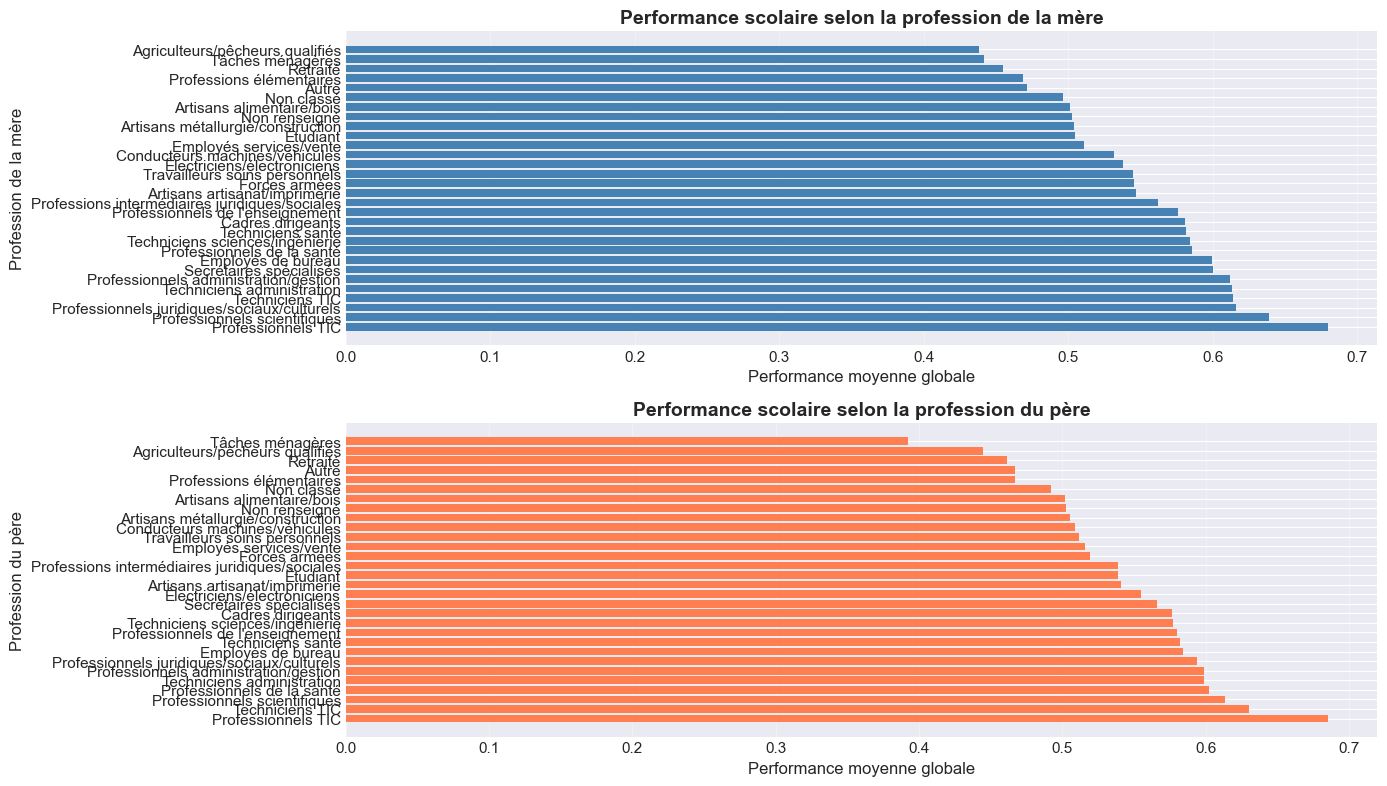

In [ ]:
plt.figure(figsize=(14, 8))

perf_mother = df.groupby('OCOD1_Category')['OverallPerformance'].agg(['mean', 'count']).reset_index()
perf_mother = perf_mother[perf_mother['count'] >= 10]
perf_mother = perf_mother.sort_values('mean', ascending=False)

plt.subplot(2, 1, 1)
plt.barh(perf_mother['OCOD1_Category'], perf_mother['mean'], color='steelblue')
plt.xlabel('Performance moyenne globale', fontsize=12)
plt.ylabel('Profession de la mère', fontsize=12)
plt.title('Performance scolaire selon la profession de la mère', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

perf_father = df.groupby('OCOD2_Category')['OverallPerformance'].agg(['mean', 'count']).reset_index()
perf_father = perf_father[perf_father['count'] >= 10]
perf_father = perf_father.sort_values('mean', ascending=False)

plt.subplot(2, 1, 2)
plt.barh(perf_father['OCOD2_Category'], perf_father['mean'], color='coral')
plt.xlabel('Performance moyenne globale', fontsize=12)
plt.ylabel('Profession du père', fontsize=12)
plt.title('Performance scolaire selon la profession du père', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

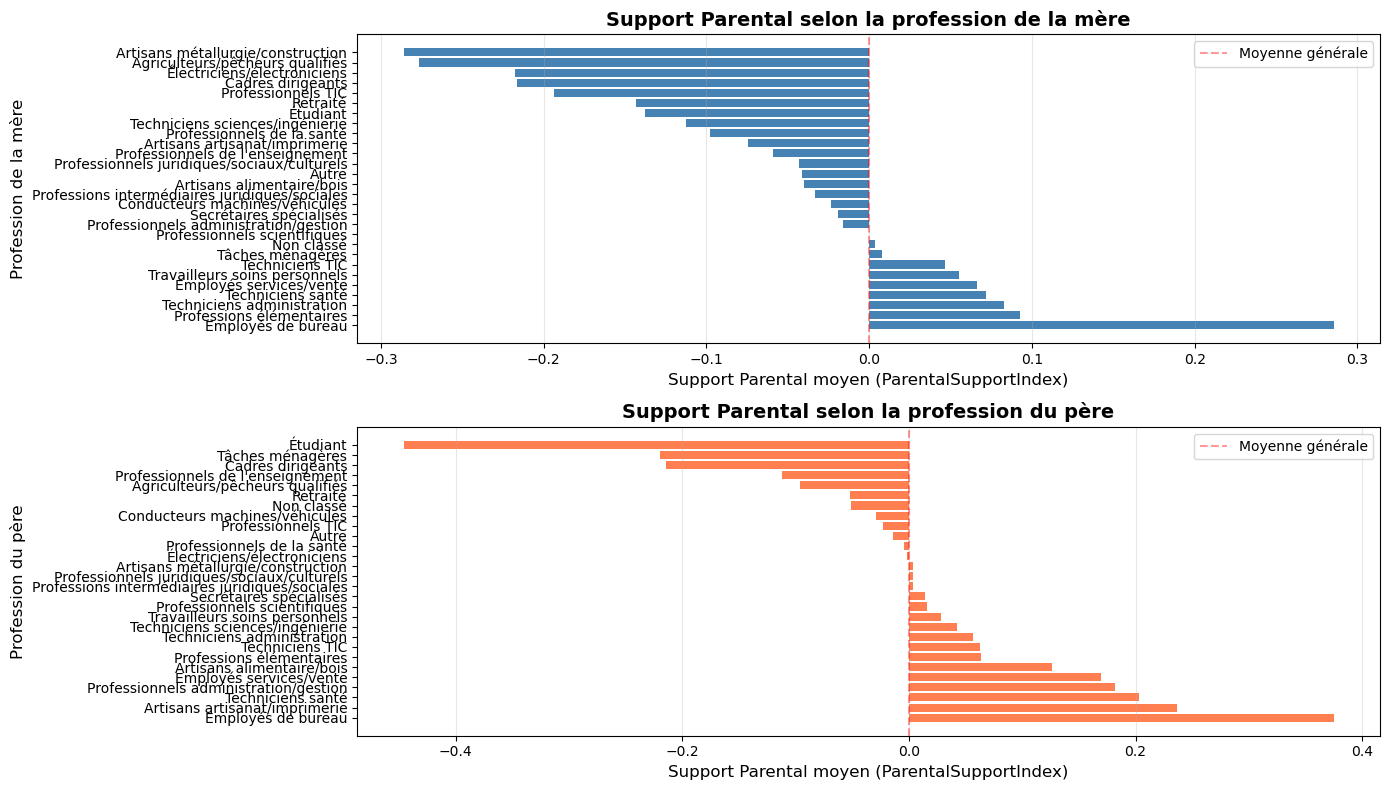

=== Support Parental par profession de la MÈRE ===
                                    OCOD1_Category      mean  count
7                               Employés de bureau  0.285259  22930
19                        Professions élémentaires  0.092372  30174
23                      Techniciens administration  0.082811   8383
24                               Techniciens santé  0.071767   7770
8                          Employés services/vente  0.066086  53785
26                   Travailleurs soins personnels  0.055278  15903
22                                 Techniciens TIC  0.046716    373
27                                Tâches ménagères  0.008027  59147
10                                      Non classé  0.003776  13275
17                    Professionnels scientifiques -0.000121   4902
13           Professionnels administration/gestion -0.015871  10970
21                         Secrétaires spécialisés -0.019201   6329
6                   Conducteurs machines/véhicules -0.023710   50

In [ ]:
plt.figure(figsize=(14, 8))

support_mother = df.groupby('OCOD1_Category')['ParentalSupportIndex'].agg(['mean', 'count']).reset_index()
support_mother = support_mother[support_mother['count'] >= 10] 
support_mother = support_mother.sort_values('mean', ascending=False)

plt.subplot(2, 1, 1)
plt.barh(support_mother['OCOD1_Category'], support_mother['mean'], color='steelblue')
plt.xlabel('Support Parental moyen (ParentalSupportIndex)', fontsize=12)
plt.ylabel('Profession de la mère', fontsize=12)
plt.title('Support Parental selon la profession de la mère', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.axvline(df['ParentalSupportIndex'].mean(), color='red', linestyle='--', alpha=0.4, label='Moyenne générale')
plt.legend()

support_father = df.groupby('OCOD2_Category')['ParentalSupportIndex'].agg(['mean', 'count']).reset_index()
support_father = support_father[support_father['count'] >= 10]
support_father = support_father.sort_values('mean', ascending=False)

plt.subplot(2, 1, 2)
plt.barh(support_father['OCOD2_Category'], support_father['mean'], color='coral')
plt.xlabel('Support Parental moyen (ParentalSupportIndex)', fontsize=12)
plt.ylabel('Profession du père', fontsize=12)
plt.title('Support Parental selon la profession du père', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.axvline(df['ParentalSupportIndex'].mean(), color='red', linestyle='--', alpha=0.4, label='Moyenne générale')
plt.legend()

plt.tight_layout()
plt.show()

print("=== Support Parental par profession de la MÈRE ===")
print(support_mother.sort_values('mean', ascending=False))
print("\n=== Support Parental par profession du PÈRE ===")
print(support_father.sort_values('mean', ascending=False))

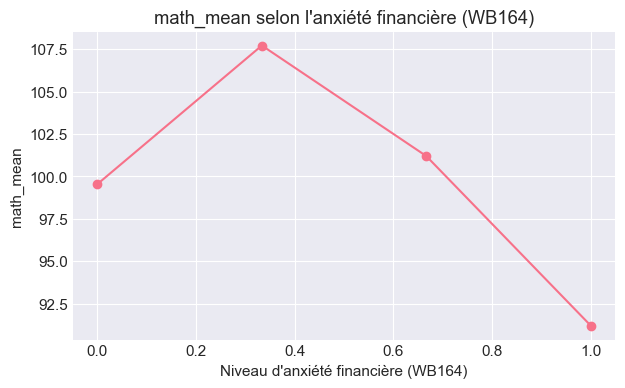

In [31]:
# Calcul de la moyenne des scores de maths par niveau d’anxiété financière
df_plot = df.groupby('WB164')['MathScore'].mean().reset_index()

plt.figure(figsize=(7,4))
plt.plot(df_plot['WB164'], df_plot['MathScore'], marker='o')
plt.title("math_mean selon l'anxiété financière (WB164)")
plt.xlabel("Niveau d'anxiété financière (WB164)")
plt.ylabel("math_mean")
plt.grid(True)
plt.show()

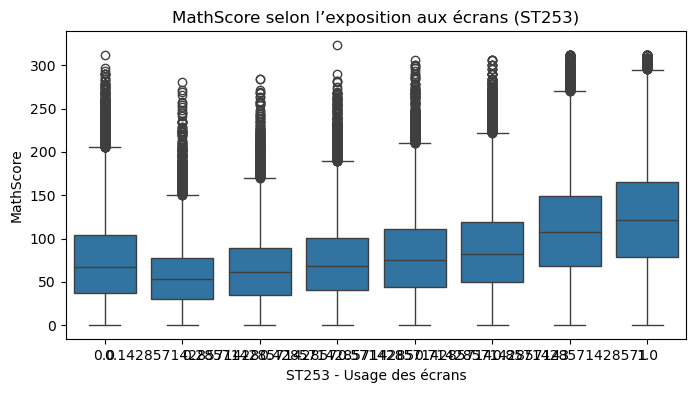

In [105]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='ST253', y='MathScore')
plt.title("MathScore selon l’exposition aux écrans (ST253)")
plt.xlabel("ST253 - Usage des écrans")
plt.ylabel("MathScore")
plt.show()


In [106]:
wellbeing_vars = {
    'WB154': 'Symptômes physiques (maux de tête, stress, anxiété)',
    'WB155': 'Satisfaction vie (santé, relations, école)',
    'ST345': 'Gestion stress/nervosité/récupération',
    'ST034': 'Sentiment d\'appartenance à l\'école',
    'WB164': 'Anxiété financière familiale'
}
df['Performance_Global'] = df[['MathScore', 'reading_q1_average_score', 'science_q1_average_score']].mean(axis=1, skipna=True)
key_vars = list(wellbeing_vars.keys()) + ['Performance_Global', 'EFFORT1', 'ST322']
df_clean = df[key_vars].dropna()

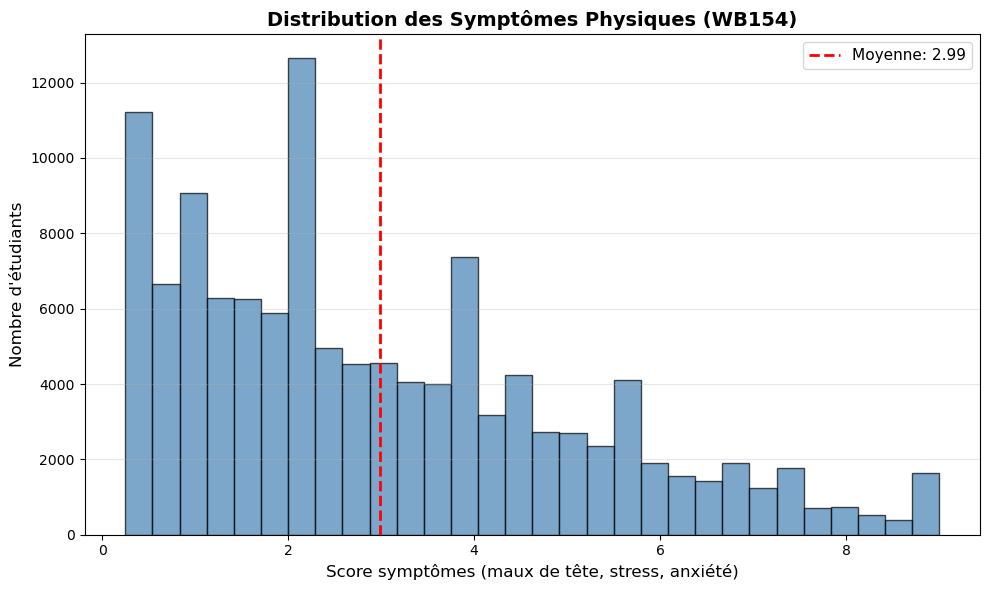

Nombre d'étudiants avec symptômes (> 0) : 120585


In [110]:
plt.figure(figsize=(10, 6))
data = df['WB154'].dropna()
data = data[data != 0]  # Retirer les valeurs nulles
plt.hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Moyenne: {data.mean():.2f}')
plt.title('Distribution des Symptômes Physiques (WB154)', fontweight='bold', fontsize=14)
plt.xlabel('Score symptômes (maux de tête, stress, anxiété)', fontsize=12)
plt.ylabel('Nombre d\'étudiants', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('fig1_histogramme_symptomes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Nombre d'étudiants avec symptômes (> 0) : {len(data)}")

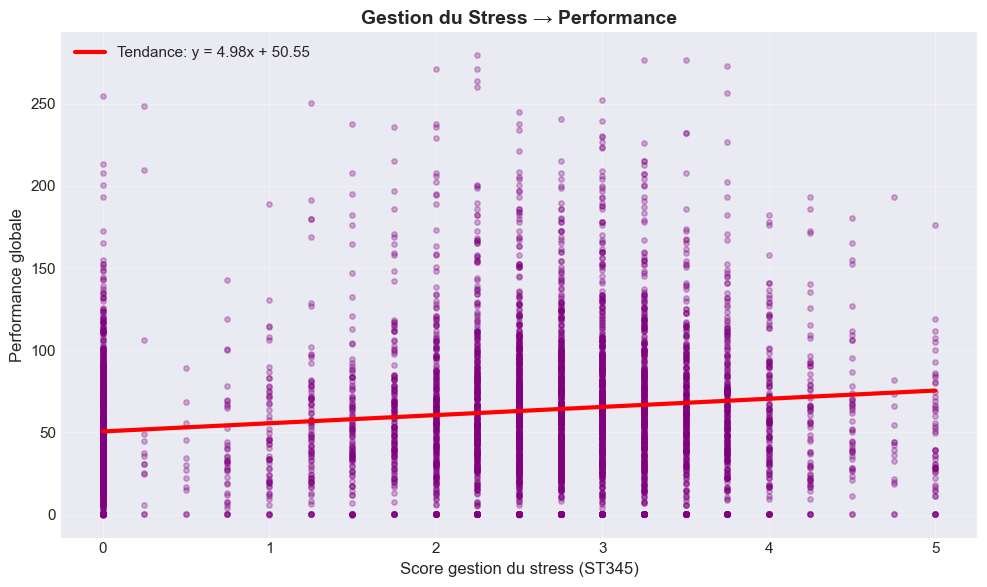

In [31]:
plt.figure(figsize=(10, 6))
data = df[['ST345', 'Performance_Global']].dropna()
if len(data) > 5000:
    data = data.sample(5000)

plt.scatter(data['ST345'], data['Performance_Global'], alpha=0.3, s=15, color='purple')

# Ligne de tendance
z = np.polyfit(data['ST345'], data['Performance_Global'], 1)
p = np.poly1d(z)
x_line = np.linspace(data['ST345'].min(), data['ST345'].max(), 100)
plt.plot(x_line, p(x_line), "r-", linewidth=3, 
         label=f'Tendance: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.title('Gestion du Stress → Performance', fontweight='bold', fontsize=14)
plt.xlabel('Score gestion du stress (ST345)', fontsize=12)
plt.ylabel('Performance globale', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig3_stress_performance.png', dpi=300, bbox_inches='tight')
plt.show()

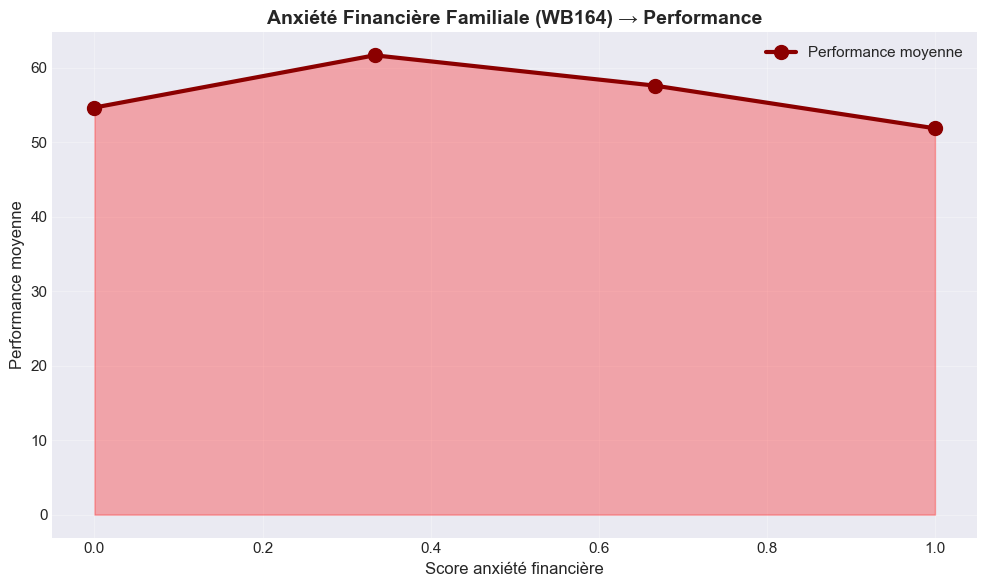

In [40]:

plt.figure(figsize=(10, 6))
data = df[['WB164', 'Performance_Global']].dropna()
grouped = data.groupby('WB164')['Performance_Global'].agg(['mean', 'count'])
grouped = grouped[grouped['count'] > 100]

plt.plot(grouped.index, grouped['mean'], marker='o', linewidth=3, markersize=10, 
         color='darkred', label='Performance moyenne')
plt.fill_between(grouped.index, grouped['mean'], alpha=0.3, color='red')

plt.title('Anxiété Financière Familiale (WB164) → Performance', 
          fontweight='bold', fontsize=14)
plt.xlabel('Score anxiété financière', fontsize=12)
plt.ylabel('Performance moyenne', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig5_anxiete_financiere.png', dpi=300, bbox_inches='tight')
plt.show()

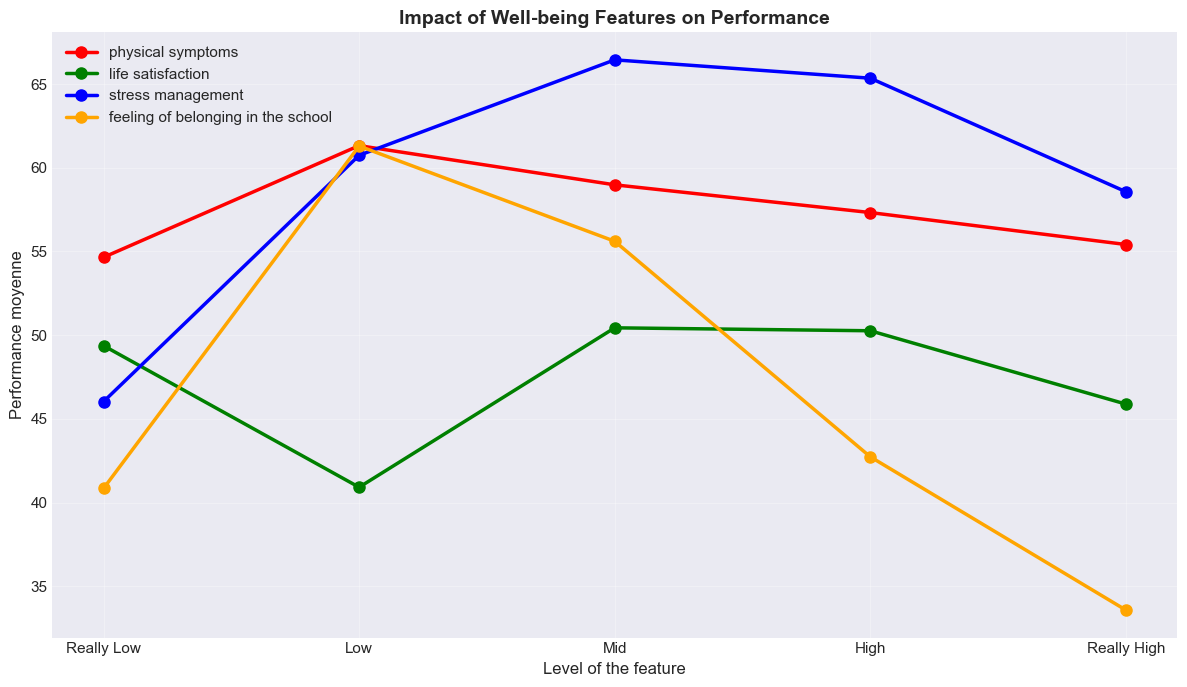

In [39]:
plt.figure(figsize=(12, 7))

variables = [
    ('WB154', 'physical symptoms', 'red'),
    ('WB155', 'life satisfaction', 'green'),
    ('ST345', 'stress management', 'blue'),
    ('ST034', 'feeling of belonging in the school', 'orange')
]

for var, label, color in variables:
    data = df[[var, 'Performance_Global']].dropna()
    data['bin'] = pd.cut(data[var], bins=5, 
                         labels=['Really Low', 'Low', 'Mid', 'High', 'Really High'])
    grouped = data.groupby('bin')['Performance_Global'].mean()
    
    plt.plot(range(len(grouped)), grouped.values, marker='o', linewidth=2.5, 
             label=label, color=color, markersize=8)

plt.xticks(range(5), ['Really Low', 'Low', 'Mid', 'High', 'Really High'])
plt.title('Impact of Well-being Features on Performance', 
          fontweight='bold', fontsize=14)
plt.xlabel('Level of the feature', fontsize=12)
plt.ylabel('Performance moyenne', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig8_comparaison_variables.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
df['ST034'].describe()

count    823967.000000
mean          2.313571
std           1.032723
min           0.000000
25%           2.000000
50%           2.333333
75%           3.000000
max           6.000000
Name: ST034, dtype: float64

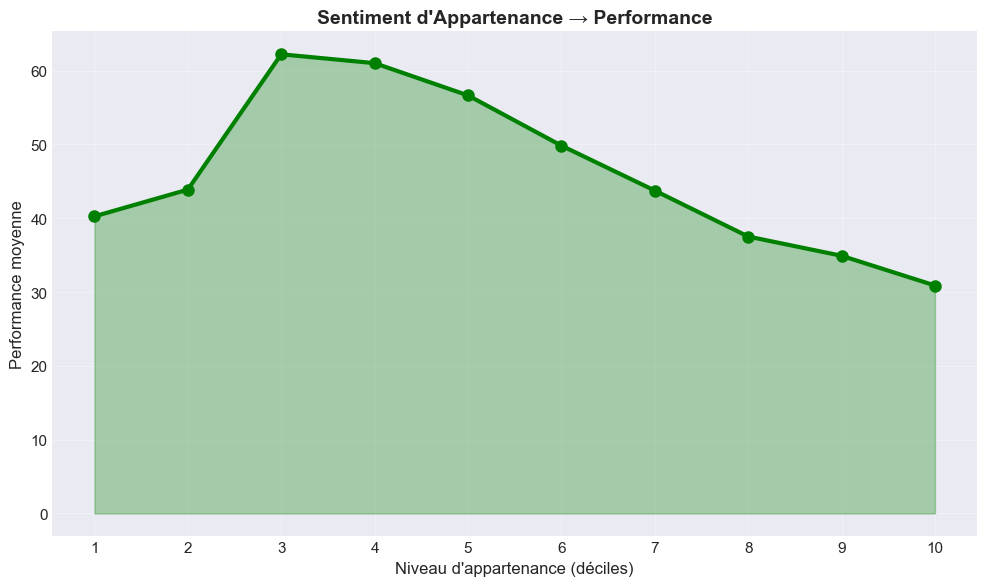

In [36]:
plt.figure(figsize=(10, 6))
data = df[['ST034', 'Performance_Global']].dropna()
data['Appartenance_Bin'] = pd.cut(data['ST034'], bins=10)
grouped = data.groupby('Appartenance_Bin')['Performance_Global'].mean()

plt.plot(range(len(grouped)), grouped.values, marker='o', linewidth=3, 
         markersize=8, color='green')
plt.fill_between(range(len(grouped)), grouped.values, alpha=0.3, color='green')

plt.title('Sentiment d\'Appartenance → Performance', fontweight='bold', fontsize=14)
plt.xlabel('Niveau d\'appartenance (déciles)', fontsize=12)
plt.ylabel('Performance moyenne', fontsize=12)
plt.xticks(range(len(grouped)), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig7_courbe_appartenance.png', dpi=300, bbox_inches='tight')
plt.show()
